In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import seaborn as sb

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.drop(['PassengerId', 'Name', 'Parch', 'SibSp', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [7]:
df.Sex = df.Sex.map({'male': 0, 'female': 1})

In [8]:
df.describe()

,Survived,Pclass,Sex,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,32.204208
std,0.486592,0.836071,0.477990,14.526497,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200


In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

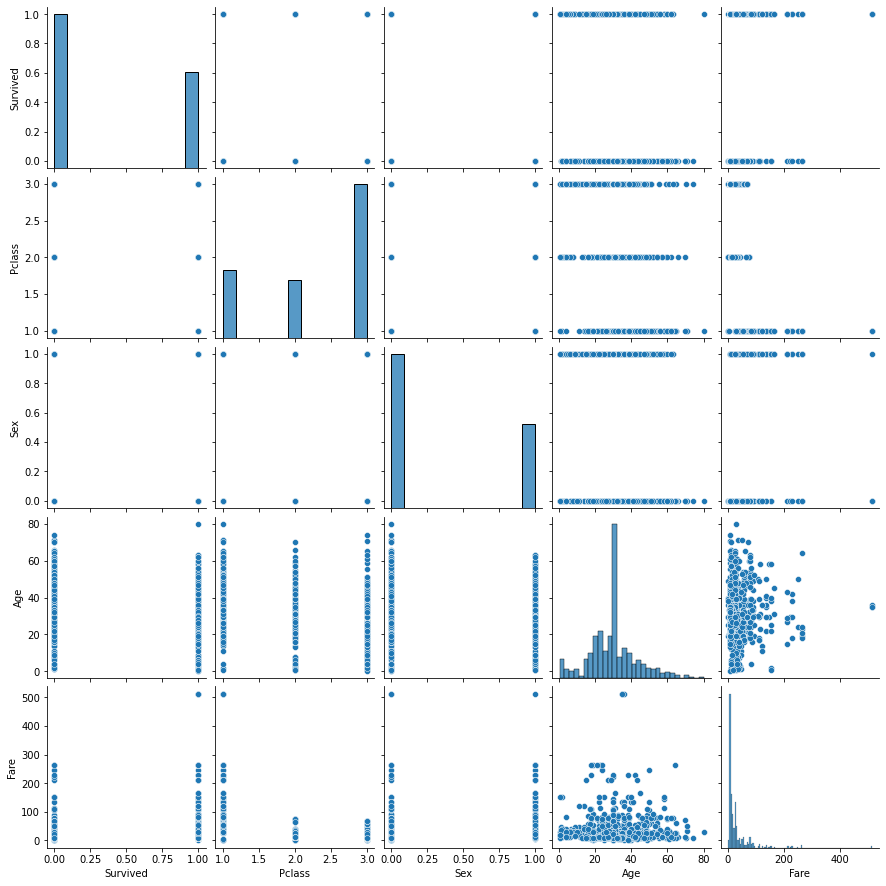

In [10]:
sb.pairplot(df)

In [11]:
data_x = df.drop('Pclass', axis=1)
data_y = df.Pclass

In [12]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.1)

In [13]:
decission_tree = tree.DecisionTreeClassifier()

In [14]:
decission_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [15]:
print(f'Score: {round(decission_tree.score(test_x, test_y), 4) * 100.0}%')

Score: 84.44%


In [16]:
classes = {1: 'Primera Clase', 2: 'Segunda Clase', 3: 'Tercera Clase'}
survived_labels = {0 : 'Murio', 1: 'Vivió'}
genre = {0: 'masculino', 1: 'femenino'}
survived = 1
sex = 0
age = 60
fare = 25

In [17]:
predicted = decission_tree.predict([[survived, sex, age, fare]])
print(f'Una persona de sexo {genre[sex]} de edad {age} años que pagó {fare} libras y además {survived_labels[survived]} pertenece a la {classes[predicted[0]]}')

Una persona de sexo masculino de edad 60 años que pagó 25 libras y además Vivió pertenece a la Segunda Clase


[Text(131.66540492957748, 210.645, 'X[3] <= 25.527\ngini = 0.596\nsamples = 801\nvalue = [199, 162, 440]'),
 Text(49.51267605633803, 197.055, 'X[3] <= 10.481\ngini = 0.34\nsamples = 501\nvalue = [5, 102, 394]'),
 Text(23.577464788732392, 183.465, 'X[3] <= 2.006\ngini = 0.07\nsamples = 304\nvalue = [5, 6, 293]'),
 Text(18.861971830985915, 169.875, 'X[2] <= 32.85\ngini = 0.643\nsamples = 14\nvalue = [5, 6, 3]'),
 Text(9.430985915492958, 156.285, 'X[2] <= 24.35\ngini = 0.494\nsamples = 9\nvalue = [2, 6, 1]'),
 Text(4.715492957746479, 142.695, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(14.146478873239436, 142.695, 'gini = 0.375\nsamples = 8\nvalue = [2, 6, 0]'),
 Text(28.292957746478873, 156.285, 'X[2] <= 37.0\ngini = 0.48\nsamples = 5\nvalue = [3, 0, 2]'),
 Text(23.577464788732392, 142.695, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(33.00845070422535, 142.695, 'X[2] <= 44.5\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(28.292957746478873, 129.10500000000002, '

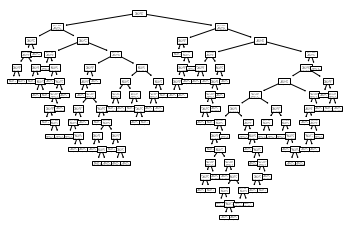

In [18]:
tree.plot_tree(decision_tree=decission_tree)